# Name : Ankita Mandal
# Course : B-Tech, Branch : CSE Hons.(AI & ML)
# Q-Id : 20030010
## University Roll No. : 2001313007

# *Logistic Regression Using Tensorflow*

### Step 1: Read Data

In [ ]:
%matplotlib inline

In [ ]:
import numpy as np # linear algebra
import seaborn as sns
sns.set(style='whitegrid')
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
print(tf.__version__)

2.9.2


In [ ]:
iris = pd.read_csv('Iris.csv')

In [ ]:
iris.shape

(150, 6)

In [ ]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris = iris[:100]

In [ ]:
iris.shape

(100, 6)

# Step 2: Numerical procwssing

Replace 'Iris-setosa' as 0 <br>
Replace 'Iris-versicolor' as 1

In [ ]:
iris.Species = iris.Species.replace(to_replace=['Iris-setosa', 'Iris-versicolor'], value=[0, 1])

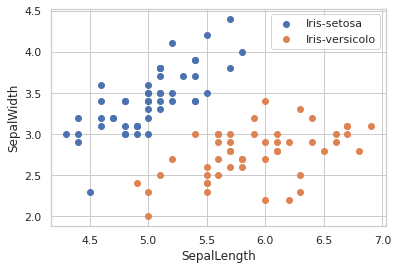

In [ ]:
plt.scatter(iris[:50].SepalLengthCm, iris[:50].SepalWidthCm, label='Iris-setosa')
plt.scatter(iris[51:].SepalLengthCm, iris[51:].SepalWidthCm, label='Iris-versicolo')
plt.xlabel('SepalLength')
plt.ylabel('SepalWidth')
plt.legend(loc='best')

In [ ]:
X = iris.drop(labels=['Id', 'Species'], axis=1).values
y = iris.Species.values

# Step 3: Split data
trainset: 80%<br>
testset: 20%

In [ ]:
train_index = np.random.choice(len(X), round(len(X) * 0.8), replace=False)

In [ ]:
# diff set
test_index = np.array(list(set(range(len(X))) - set(train_index)))
train_X = X[train_index]
train_y = y[train_index]
test_X = X[test_index]
test_y = y[test_index]

In [ ]:
# Define the normalized function
def min_max_normalized(data):
    col_max = np.max(data, axis=0)
    col_min = np.min(data, axis=0)
    return np.divide(data - col_min, col_max - col_min)

## Step 4: Normalized processing

In [ ]:
# Normalized processing, must be placed after the data set segmentation,
# otherwise the test set will be affected by the training set
train_X = min_max_normalized(train_X)
test_X = min_max_normalized(test_X)

## Step 5: Build the model framework

In [ ]:
# Begin building the model framework
# Declare the variables that need to be learned and initialization
# There are 4 features here, A's dimension is (4, 1)
A = tf.Variable(tf.random.normal(shape=[4, 1]))
b = tf.Variable(tf.random.normal(shape=[1, 1]))
init = tf.compat.v1.global_variables_initializer()
sess = tf.compat.v1.Session()
sess.run(init)

In [ ]:
# Define placeholders
data = tf.compat.v1.placeholder(dtype=tf.float32, shape=[None, 4])
target = tf.compat.v1.placeholder(dtype=tf.float32, shape=[None, 1])

In [ ]:
# Declare the model you need to learn
mod = tf.matmul(data, A) + b


In [ ]:
# Declare loss function
# Use the sigmoid cross-entropy loss function,
# first doing a sigmoid on the model result and then using the cross-entropy loss function
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=mod, labels=target))


In [ ]:
# Define the learning rate， batch_size etc.
learning_rate = 0.003
batch_size = 30
iter_num = 1500

In [ ]:
# Define the optimizer
opt = tf.train.GradientDescentOptimizer(learning_rate)


In [ ]:
# Define the goal
goal = opt.minimize(loss)


In [ ]:
# Define the accuracy
# The default threshold is 0.5, rounded off directly
prediction = tf.round(tf.sigmoid(mod))
# Bool into float32 type
correct = tf.cast(tf.equal(prediction, target), dtype=tf.float32)
# Average
accuracy = tf.reduce_mean(correct)
# End of the definition of the model framework


In [ ]:
# Start training model
# Define the variable that stores the result
loss_trace = []
train_acc = []
test_acc = []

## Step 6: Model training

In [ ]:
# training model
for epoch in range(iter_num):
    # Generate random batch index
    batch_index = np.random.choice(len(train_X), size=batch_size)
    batch_train_X = train_X[batch_index]
    batch_train_y = np.matrix(train_y[batch_index]).T
    sess.run(goal, feed_dict={data: batch_train_X, target: batch_train_y})
    temp_loss = sess.run(loss, feed_dict={data: batch_train_X, target: batch_train_y})
    # convert into a matrix, and the shape of the placeholder to correspond
    temp_train_acc = sess.run(accuracy, feed_dict={data: train_X, target: np.matrix(train_y).T})
    temp_test_acc = sess.run(accuracy, feed_dict={data: test_X, target: np.matrix(test_y).T})
    # recode the result
    loss_trace.append(temp_loss)
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)
    # output
    if (epoch + 1) % 300 == 0:
        print('epoch: {:4d} loss: {:5f} train_acc: {:5f} test_acc: {:5f}'.format(epoch + 1, temp_loss, temp_train_acc, temp_test_acc))

epoch:  300 loss: 0.741521 train_acc: 0.287500 test_acc: 0.050000
epoch:  600 loss: 0.683268 train_acc: 0.500000 test_acc: 0.300000
epoch:  900 loss: 0.631161 train_acc: 0.625000 test_acc: 0.400000
epoch: 1200 loss: 0.640751 train_acc: 0.725000 test_acc: 0.500000
epoch: 1500 loss: 0.607362 train_acc: 0.787500 test_acc: 0.550000


## Step 7: Visualization

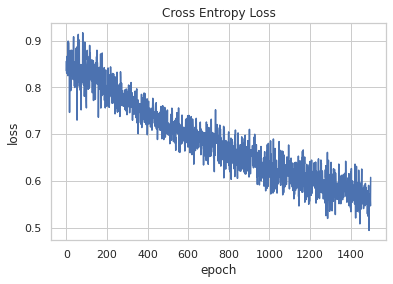

In [ ]:
# Visualization of the results
# loss function
plt.plot(loss_trace)
plt.title('Cross Entropy Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

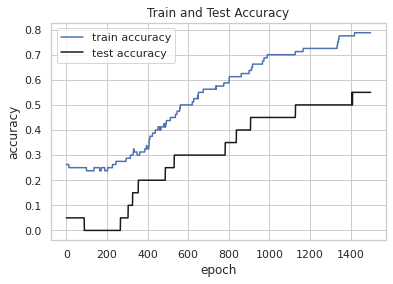

In [ ]:
# accuracy
plt.plot(train_acc, 'b-', label='train accuracy')
plt.plot(test_acc, 'k-', label='test accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Train and Test Accuracy')
plt.legend(loc='best')
plt.show()